In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import math
import pytraj as pt
import matplotlib as mp
mp.use('agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy as hc
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
#alt.renderers.enable("default")
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()
from plotly import graph_objs as go
import plotly.figure_factory as ff

import seaborn as sns

#%matplotlib inline
%matplotlib notebook

In [2]:
input_trajectory = '/run/user/1000/gvfs/sftp:host=gullveig.intra.ecu.edu,user=sanchezw/data/people/sanchezw/work/GPU/proteins/kim/6_analysis/image/data/CA_full_traj_aligned_1_256.nc'
fixed_topology = '/run/user/1000/gvfs/sftp:host=gullveig.intra.ecu.edu,user=sanchezw/data/people/sanchezw/work/GPU/proteins/kim/6_analysis/image/data/CA_full_traj_aligned_1_256.top'

In [3]:
def names():	
	atom=traj.topology.residues
	list1=[]
	for ii in atom:
		some=str(ii).split()[0].strip('<,0123456789')
		list1.append(some)
	return list1

def id_info(res_num):
	
	if res_num <=345 and res_num >= 1:
		sub_name = 'A1I'
		seq= res_num
	elif res_num >=346 and res_num <= 450:
                sub_name = 'SI'
                seq= res_num - 345 +1
	elif res_num >=451 and res_num <= 555:
                sub_name = 'SII'
                seq= res_num - 450 +1
	elif res_num >=556 and res_num <= 900:
                sub_name = 'A1II'
                seq= res_num - 555 +1

	if (res_num >=1 and res_num <=39) or (res_num >=556 and res_num <=594):
		domain_name ='N'
	elif (res_num >=40 and res_num <=112) or (res_num >=595 and res_num <=667):
		domain_name ='RI'
	elif (res_num >=113 and res_num <=184) or (res_num >=668 and res_num <=739):
		domain_name ='RII'
	elif (res_num >=185 and res_num <=261) or (res_num >=740 and res_num <=816):
		domain_name ='RIII'
	elif (res_num >=262 and res_num <=345) or (res_num >=817 and res_num <=900):
		domain_name ='RIV'
	elif (res_num >=346 and res_num <= 400) or (res_num >=451 and res_num <=500):
		domain_name ='EFI'
	elif (res_num >=401 and res_num <=450) or (res_num >= 501 and res_num <=555):
		domain_name ='EFII'
	return [sub_name, domain_name, str(seq)]

'''
Purpose: 
Arguments: (1) 2d array where each entry is a position vector.
           (2) 2d array where each entry is a position vector.
NOTES:     v1 and v2 must be the same length.
'''
def n_n_corr(v1, v2):
    a1=np.average(v1)
    a2=np.average(v2)
    answer = (np.dot(a1, a2)- np.linalg.norm(np.cross(a1, a2))) \
                 /                                  \
                 ((np.dot(a1, a1) - np.linalg.norm(np.cross(a1, a1))) * (np.dot(a2, a2) - np.linalg.norm(np.cross(a2, a2))))**0.5 
    return answer

In [4]:
traj = pt.load(input_trajectory, fixed_topology)

t0 = traj.xyz

df = pd.DataFrame()
dict1 = dict()
#for frame in t0:

list3=range(1,900,1)
list2=[]
for i in list3:
	info = id_info(i)
	info= info[0] + '.' + info[1] + '.' +names()[i-1]+ info[2]
	list2.append(info)
#trajectory = pd.DataFrame(columns = list2)

ii = 1
for frame in t0:
	frame = [np.array([coord]) for coord in frame]
	if ii == 1:
		trajectory = np.array(frame)
	else:
		trajectory = np.concatenate((trajectory, frame), axis = 1)
	ii += 1

In [5]:
print(trajectory)

[[[ 89.02442932  96.82200623 104.57855988]
  [ 90.94622803  94.00221252 106.23851013]
  [ 94.77643585  95.19319916 104.80291748]
  ...
  [ 85.13301086  88.69421387 118.27059937]
  [ 85.53327179  88.71202087 118.73023987]
  [ 85.34165955  88.66157532 118.58602142]]

 [[ 88.31729126  94.70773315 101.35471344]
  [ 89.56776428  92.47112274 103.13317871]
  [ 94.53915405  94.08740234 101.0506134 ]
  ...
  [ 83.30067444  91.09346008 115.87643433]
  [ 83.53990173  90.7644577  116.22901154]
  [ 83.4831543   90.85005951 115.91025543]]

 [[ 91.82480621  93.46981049 100.05641937]
  [ 92.43032074  90.35066223 101.70028687]
  [ 97.55348969  92.3313446   99.57940674]
  ...
  [ 85.84631348  90.82117462 113.00215149]
  [ 85.65421295  90.32782745 112.92165375]
  [ 85.94215393  90.45501709 112.92491913]]

 ...

 [[ 29.42344093 116.93871307  69.18517303]
  [ 24.54409599 118.19384003  67.28656769]
  [ 27.11031532 112.35129547  73.99547577]
  ...
  [ 50.24477005  87.52348328  84.36929321]
  [ 49.94869614  8

In [8]:
trajectory = list(trajectory)
trajectory = [list(ii) for ii in trajectory]
traj = pd.DataFrame.from_dict(dict(zip(list2, trajectory)))
#print(traj.iloc[:,2])
#print(np.corrcoef(traj.iloc[:,2], traj.iloc[:,3]))


#n_n_corr(traj.iloc[:,0], traj.iloc[:,1])
#print(traj.corr(method="nncorr"))
cor_data = dict()
ii = 0
steps = len(list(traj.columns))
size = int(steps / 10)
print("0% ", end = "")
for col1 in traj.columns:
    cor_data[col1] = []
    ii += 1
    if ii % size == 0:
        print(str(int(ii / steps) * 100) + " %", end = "")
    for col2 in traj.columns:
        col1_data = np.array(traj[col1])
        col2_data = np.array(traj[col2])
        cor = n_n_corr(col1_data, col2_data)
        cor_data[col1].append(cor)
        


0% 0 %0 %0 %0 %0 %0 %0 %0 %0 %0 %

In [9]:
corr = pd.DataFrame.from_dict(cor_data, orient = 'index', 
                       columns = list(traj.columns))
corr = corr.reindex(list2, columns = list2)
corr

,A1I.N.ALA1,A1I.N.MET2,A1I.N.VAL3,A1I.N.SER4,A1I.N.GLU5,A1I.N.PHE6,A1I.N.LEU7,A1I.N.LYS8,A1I.N.GLN9,A1I.N.ALA10,...,A1II.RIV.GLU336,A1II.RIV.LYS337,A1II.RIV.ILE338,A1II.RIV.LEU339,A1II.RIV.VAL340,A1II.RIV.ALA341,A1II.RIV.LEU342,A1II.RIV.CYS343,A1II.RIV.GLY344,A1II.RIV.GLY345
A1I.N.ALA1,1.000000,0.984044,0.972373,0.975300,0.992906,0.982417,0.966584,0.971513,0.989950,0.974933,...,0.665593,0.698491,0.715753,0.697313,0.705899,0.739943,0.737275,0.724001,0.748872,0.724561
A1I.N.MET2,0.984044,1.000000,0.977614,0.967279,0.978061,0.985900,0.962588,0.958468,0.975180,0.972196,...,0.683127,0.715273,0.733313,0.715273,0.722976,0.756833,0.755101,0.741560,0.765491,0.740591
A1I.N.VAL3,0.972373,0.977614,1.000000,0.977776,0.972029,0.989954,0.980142,0.963922,0.970882,0.987316,...,0.669616,0.700600,0.721169,0.703890,0.709206,0.743410,0.744533,0.729650,0.751585,0.724796
A1I.N.SER4,0.975300,0.967279,0.977776,1.000000,0.980741,0.979568,0.989223,0.986003,0.982206,0.990362,...,0.645003,0.677052,0.696664,0.678809,0.685300,0.719864,0.719742,0.705172,0.728429,0.702310
A1I.N.GLU5,0.992906,0.978061,0.972029,0.980741,1.000000,0.981000,0.970891,0.978707,0.997038,0.977934,...,0.657015,0.689941,0.707484,0.689054,0.697446,0.731652,0.729261,0.715788,0.740579,0.716044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1II.RIV.ALA341,0.739943,0.756833,0.743410,0.719864,0.731652,0.744339,0.719609,0.707596,0.728080,0.729251,...,0.937600,0.963088,0.975998,0.958464,0.971417,1.000000,0.972546,0.979926,0.991152,0.972240
A1II.RIV.LEU342,0.737275,0.755101,0.744533,0.719742,0.729261,0.744042,0.720907,0.706290,0.725736,0.729832,...,0.932214,0.946463,0.976357,0.965682,0.958290,0.972546,1.000000,0.983012,0.966689,0.945562
A1II.RIV.CYS343,0.724001,0.741560,0.729650,0.705172,0.715788,0.729761,0.705745,0.692129,0.712210,0.715047,...,0.948544,0.963877,0.992817,0.977254,0.975616,0.979926,0.983012,1.000000,0.971223,0.959042
A1II.RIV.GLY344,0.748872,0.765491,0.751585,0.728429,0.740579,0.752797,0.727887,0.716456,0.737018,0.737621,...,0.929481,0.957031,0.966949,0.949267,0.963892,0.991152,0.966689,0.971223,1.000000,0.971919


In [10]:
# create dictionary with column name as key and cluster as value
clusters = dict()
for col in traj.columns:  
    clusters[col] = col.split('.')[0]

In [280]:
def visualize_feature_correlation(data, correlation, user_defined_clusters, cluster_scope = None):
    df = data.copy()
    corr = correlation
    default_feature_order = sorted(list(df.columns))
    corr_condensed = hc.distance.squareform(1 - np.abs(correlation) ) # convert to condensed
    z = hc.linkage(corr_condensed, method='average');
    feature_order = hc.dendrogram(z, labels=df.columns, no_plot=True)["ivl"];
    
    sidebar_width = 200
    sidebar_component_height = 75

    #compute PCA and store as X,Y coordinates for each feature
    pca = PCA(n_components = 3)
    pca.fit(np.abs(corr))
    names = list(df.columns)
    coords = pca.transform(np.abs(corr)).tolist()
    pca_coords = dict(zip(names, coords))
    pca_coords = pd.DataFrame.from_dict(pca_coords, orient = "index")
    pca_coords = pca_coords.reset_index()
    pca_coords = pca_coords.rename({0: "X", 1: "Y", 2: "Z", "index": "feature"}, axis = 1)

    num_labels = user_defined_clusters.values()
    num_labels = set(num_labels)
    num_labels = len(num_labels)
    silhouette_scores = [
        {
            "cluster_num": num_labels,
            "silhouette_score": 1,
            "feature": col,
            "cluster": user_defined_clusters[col]
        }
        for col in df.columns
    ]
    
    
    cluster_label_df = pd.DataFrame(silhouette_scores)
    cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")

    cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")

    
    cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")
    
    default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()

    # Set to 1 because our modification of the original has no targets.
    pca_coords = pca_coords.reset_index()
    pca_coords["target_corr"] = 1
    
    # Add cluster name to pca_coords.
    pca_coords["cluster"] = [ii.split('.')[0] + '-' + ii.split('.')[1] for ii in list(pca_coords["feature"])]
    
    # get dataset for lines between features (if they have higher correlation than corr_threshold)
    corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
        .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
        .query("feature > feature_2")

    # Create a dictionary from pca_coords to lookup coordinates based on feature name.
    coord_lookup = dict()
    for ii in range(len(pca_coords)):
        key = pca_coords["feature"][ii]
        value = [pca_coords["X"][ii], pca_coords["Y"][ii], pca_coords["Z"][ii]]
        coord_lookup[key] = value
        
    # Keep only those lines with strong corelations above 0.7.
    corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
    corr_lines = corr_lines.loc[corr_lines["corr_abs"] > 0.72]

    # Lookup coordinates for each feature and add them to the dataframe.
    X1 = []
    X2 = []
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []
    for ii in range(len(corr_lines)):
        x1 = coord_lookup[corr_lines["feature"].iloc[ii]][0]
        x2 = coord_lookup[corr_lines["feature_2"].iloc[ii]][0]
        y1 = coord_lookup[corr_lines["feature"].iloc[ii]][1]
        y2 = coord_lookup[corr_lines["feature_2"].iloc[ii]][1]
        z1 = coord_lookup[corr_lines["feature"].iloc[ii]][2]
        z2 = coord_lookup[corr_lines["feature_2"].iloc[ii]][2]
        X1.append(x1)
        X2.append(x2)
        Y1.append(y1)
        Y2.append(y2)
        Z1.append(z1)
        Z2.append(z2)

    corr_lines["X1"] = X1
    corr_lines["X2"] = X2
    corr_lines["Y1"] = Y1
    corr_lines["Y2"] = Y2
    corr_lines["Z1"] = Z1
    corr_lines["Z2"] = Z2
    
    # Generate column containings distance between points.
    corr_lines["X.diff"] = corr_lines["X2"] - corr_lines["X1"]
    corr_lines["Y.diff"] = corr_lines["Y2"] - corr_lines["Y1"]
    corr_lines["Z.diff"] = corr_lines["Z2"] - corr_lines["Z1"]
    corr_lines["dist"]   = ((corr_lines["X.diff"]) ** 2 + (corr_lines["Y.diff"]) ** 2 + (corr_lines["Z.diff"]) ** 2)**0.5
    
    corr_lines = corr_lines.loc[corr_lines["dist"] > 7.2]

    print(corr_lines)
    '''----------
    | Plot Data |
    ----------'''
    
    #sns.set(rc={'figure.figsize':(22.7,8.27)})
    # Base plot with cluster shown by color.
    #sns.relplot(data = pca_coords, x = "X", y = "Y", hue = "cluster", height = 50)
    
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', \
              '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', \
              '#9a6324', '#fffac8']
    clusters = list(set(pca_coords["cluster"]))
    color_map = dict(zip(clusters, colors))
    
    #plt.hist(corr_lines['dist'], color = 'blue', edgecolor = 'black')
    # 3D PLOT
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pca_coords["X"], pca_coords["Y"], pca_coords["Z"], c = pca_coords["cluster"].map(color_map))
    for ii in range(len(corr_lines)):
        ax.plot([corr_lines["X1"].iloc[ii], corr_lines["X2"].iloc[ii]],
                [corr_lines["Y1"].iloc[ii], corr_lines["Y2"].iloc[ii]],
                [corr_lines["Z1"].iloc[ii], corr_lines["Z2"].iloc[ii]])

    
    # Draw lines between datapoints with correlations above 0.7.
    #X = np.array([np.array(corr_lines["X1"]), np.array(corr_lines["X2"])])
    #Y = np.array([np.array(corr_lines["Y1"]), np.array(corr_lines["Y2"])])
    #plt.plot(X, Y, zorder = 0, color = "grey")
    



               feature        feature_2      corr  corr_abs        X1  \
58        A1I.RI.VAL59       A1I.N.ALA1  0.725774  0.725774 -6.192915   
286     A1I.RIV.GLY287       A1I.N.ALA1  0.721567  0.721567 -6.354204   
287     A1I.RIV.VAL288       A1I.N.ALA1  0.720638  0.720638 -6.427768   
332     A1I.RIV.ASP333       A1I.N.ALA1  0.722267  0.722267 -6.455405   
958       A1I.RI.ASP60       A1I.N.MET2  0.721689  0.721689 -6.218876   
...                ...              ...       ...       ...       ...   
759251   SII.EFI.GLU47  A1II.RIV.THR291  0.725999  0.725999  1.540803   
759293  SII.EFII.ALA89  A1II.RIV.THR291  0.722248  0.722248  1.409827   
760073   SI.EFII.GLN75  A1II.RIV.ARG292  0.727883  0.727883  1.256801   
760074   SI.EFII.LEU76  A1II.RIV.ARG292  0.720791  0.720791  1.094384   
760078   SI.EFII.GLU80  A1II.RIV.ARG292  0.724489  0.724489  1.236140   

              X2        Y1        Y2        Z1        Z2    X.diff    Y.diff  \
58     -2.060900  3.465082 -2.247868  1.513

<IPython.core.display.Javascript object>


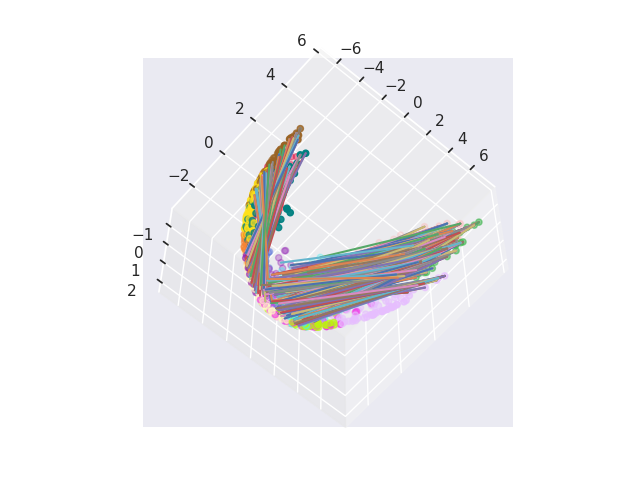

In [281]:
visualize_feature_correlation(traj, corr, clusters)